In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

df.columns()

In [4]:
#df = df.loc[:,['data','nuovi_attualmente_positivi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df.loc[:, 'numero_giorni'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-24 00:00:00", FMT)).days  )

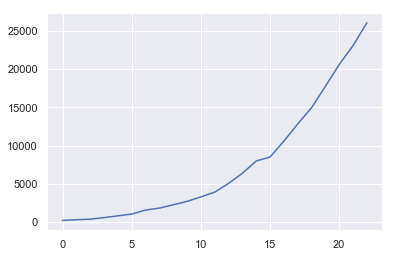

In [12]:
plt.plot(df.numero_giorni, df.totale_attualmente_positivi)

In [5]:
def exponential_model(x,a,b):
    return a*(b**x)

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

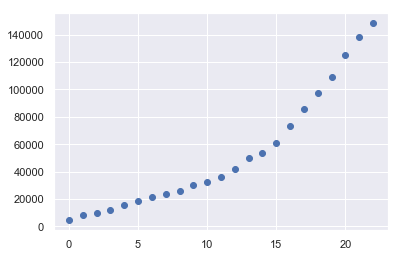

In [33]:
x = list(df.loc[:, 'numero_giorni'])
y = list(df.loc[:, 'tamponi'])
plt.scatter(x,y)

In [6]:
x = list(df.loc[:, 'numero_giorni'])
y = list(df.loc[:, 'totale_attualmente_positivi'])

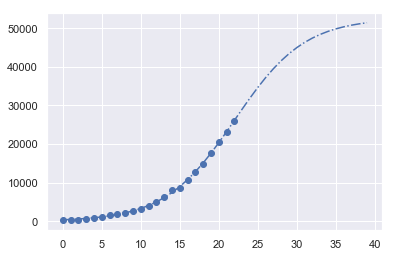

In [14]:
last_item = -1
last_day = 40
popt, pcov = curve_fit(logistic_model,x[:last_item],y[:last_item],p0=[4,70,16000])
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)
plt.plot(range(0,last_day), logistic_model(range(0,last_day), *popt), '-.')

In [72]:
logistic_model(range(0,30), *popt)

array([  380.63019994,   474.63406101,   591.59499975,   736.97664158,
         917.46463106,  1141.19718332,  1418.0154228 ,  1759.72067052,
        2180.31551045,  2696.19080493,  3326.2013573 ,  4091.5492385 ,
        5015.36872051,  6121.88685292,  7435.03082071,  8976.38488551,
       10762.48648708, 12801.60807741, 15090.39282621, 17610.95377062,
       20329.21483624, 23195.24798694, 26146.05399884, 29110.66463537,
       32016.78155804, 34797.68017669, 37398.01927719, 39777.55180552,
       41912.36104241, 43793.8788708 ])

In [56]:
x[:-1]

TypeError: list indices must be integers or slices, not tuple

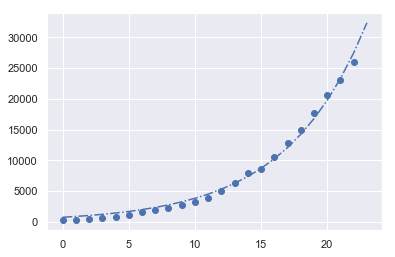

In [25]:
last_item = 24
last_day = 24
popt, pcov = curve_fit(exponential_model,x[:last_item],y[:last_item],p0=[600,1.2])
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)
plt.plot(range(0,last_day), exponential_model(range(0,last_day), *popt), '-.')

In [23]:
exponential_model(range(0,last_day), *popt)

array([  738.05047103,   869.93714349,  1025.39143776,  1208.62479375,
        1424.60121888,  1679.17176889,  1979.23305979,  2332.91410537,
        2749.7965417 ,  3241.17420497,  3820.35909481,  4503.04201204,
        5307.71764092,  6256.18559197,  7374.14097905,  8691.8705303 ,
       10245.07309125, 12075.82674857, 14233.72877507, 16777.23927815,
       19775.26495301, 23309.02584616, 27474.25570216, 32383.7955035 ])

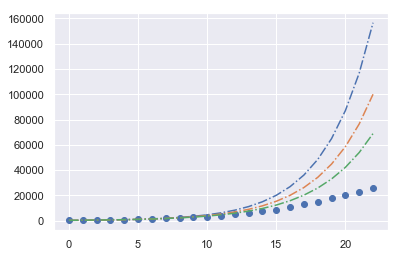

In [31]:
plt.scatter(df.numero_giorni, df.totale_attualmente_positivi)
for id in range(8,11):
    popt, pcov = curve_fit(exponential_model,x[:id],y[:id],p0=[600,1.2])
    plt.plot(df.numero_giorni, exponential_model(x, *popt), '-.')

In [23]:
x = list(df.loc[:, 'numero_giorni'])
y = list(df.loc[:, 'nuovi_attualmente_positivi'])

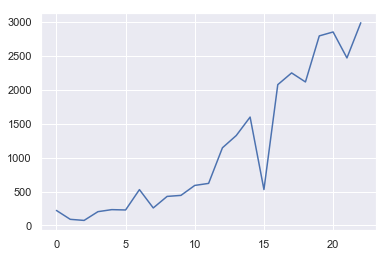

In [24]:
plt.plot(x, y)

In [36]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.13038777691761208, 0.9214759914463105, 9427.173973995392]

In [37]:
sol = int(fsolve(lambda x : logistic_model(x,errors[0],errors[1],errors[2]) - int(errors[2]),errors[1]))

In [38]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [50]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0,0,500])

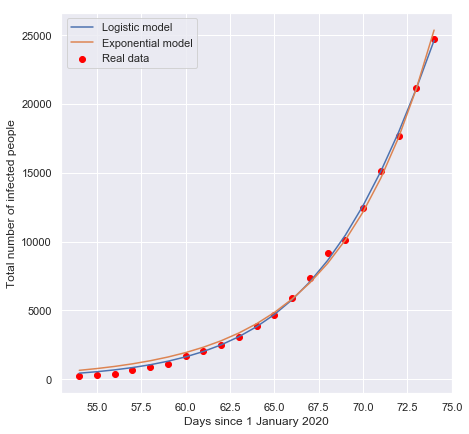

In [51]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
#plt.ylim((min(y)*0.9,c*1.1))
plt.show()